# Question 3 Python : Housing

### Step 1. Import the necessary libraries

In [6]:
import pandas as pd
import numpy as np
from random import randint

### Step 2. Create 3 differents Series, each of length 100, as follows: • The first a random number from 1 to 4• The second a random number from 1 to 3• The third a random number from 10,000 to 30,000

In [7]:
series_1 = pd.Series(np.random.randint(1, 5, 100))
series_2 = pd.Series(np.random.randint(1, 4, 100))
series_3 = pd.Series(np.random.randint(10000, 30000, 100))

### Step 3. Create a DataFrame by joinning the Series by column

In [8]:
joined_series = (series_1, series_2, series_3)
df = pd.concat(joined_series, axis=1)

In [9]:
df

,0,1,2
0,2,2,10752
1,1,3,20136
2,1,1,16067
3,3,3,26160
4,2,2,26283
...,...,...,...
95,4,2,14599
96,1,1,16113
97,1,2,22905
98,2,3,19448


### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [10]:
df.columns = ["bedrs", "bathrs", "price_sqr_meter"]

In [11]:
df

,bedrs,bathrs,price_sqr_meter
0,2,2,10752
1,1,3,20136
2,1,1,16067
3,3,3,26160
4,2,2,26283
...,...,...,...
95,4,2,14599
96,1,1,16113
97,1,2,22905
98,2,3,19448


### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [12]:
bigcolumn = pd.DataFrame(series_1.append(series_2).append(series_3))

### Step 6. Ops it seems it is going only until index 99. Is it true?

In [13]:
bigcolumn

,0
0,2
1,1
2,1
3,3
4,2
...,...
95,14599
96,16113
97,22905
98,19448


#Yes, it is 

### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [14]:
bigcolumn.reset_index()

,index,0
0,0,2
1,1,1
2,2,1
3,3,3
4,4,2
...,...,...
295,95,14599
296,96,16113
297,97,22905
298,98,19448


# Question 4 Python : Wind Statistics

### Step 1. Import the necessary libraries

In [34]:
import pandas as pd
import seaborn
import datetime
import numpy as np

### Step 2. Import the dataset from this address

In [35]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index. 

In [36]:
data    = pd.read_csv(url, sep = "\s+")
NewDate = data['Yr'].astype(str) + '-'+ data['Mo'].astype(str) + '-' + data['Dy'].astype(str)
data.insert(0, 'Date', NewDate)
data['Date'] =  pd.to_datetime(data['Date'])
data = data.drop(columns = ['Yr', 'Mo', 'Dy'])

In [37]:
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [38]:
#creating a function
def valid_year(date_column):
    
    if date_column.year > 2000:
        year = date_column.year - 100
    else:
        year = date_column.year
    
    return datetime.date(year,date_column.month,date_column.day)

#Replacing invalid years
data['Date'] = data['Date'].apply(valid_year)
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [39]:
#Checking for datatype
data['Date'].dtypes

dtype('O')

In [40]:
data['Date']= pd.to_datetime(data['Date']) 
data['Date'].dtypes

dtype('<M8[ns]')

In [41]:
data = data.set_index('Date')

### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [42]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [43]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

In [44]:
data.mean().mean()

10.227982360836924

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.

In [45]:
loc_stats = data.describe().iloc[[1,2,3,7],:]
round(loc_stats, 2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,12.36,10.64,11.66,6.31,10.46,7.09,9.80,8.50,8.49,8.71,13.12,15.60
std,5.62,5.27,5.01,3.61,4.94,3.97,4.98,4.50,4.17,4.50,5.84,6.70
min,0.67,0.21,1.50,0.00,0.13,0.00,0.00,0.00,0.00,0.04,0.13,0.67
max,35.80,33.37,33.84,28.46,37.54,26.16,30.37,31.08,25.88,28.21,42.38,42.54


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

In [46]:
day_stats = pd.DataFrame()
day_stats['mean'] = data.mean(axis = 1)
day_stats['min'] = data.min(axis = 1)
day_stats['max'] = data.max(axis = 1)
day_stats['std'] = data.std(axis = 1)
round(day_stats, 2)

,mean,min,max,std
Date,,,,
1961-01-01,13.02,9.29,18.50,2.81
1961-01-02,11.34,6.50,17.54,3.19
1961-01-03,11.64,6.17,18.50,3.68
1961-01-04,6.62,1.79,11.75,3.20
1961-01-05,10.63,6.17,13.33,2.45
...,...,...,...,...
1978-12-27,16.71,8.08,40.08,7.87
1978-12-28,15.15,5.00,41.46,9.69
1978-12-29,14.89,8.71,29.58,5.76


### Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [47]:
data.loc[data.index.month==1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### Step 12. Downsample the record to a yearly frequency for each location.

In [48]:
round(data.resample('Y', closed = 'left').mean(), 2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.31,10.36,11.37,6.97,10.90,7.74,9.73,8.87,8.66,9.85,13.52,13.68
1962-12-31,12.21,10.09,11.68,6.93,10.62,7.36,10.97,8.73,8.28,9.64,12.88,14.26
1963-12-31,12.84,10.84,12.59,7.34,11.74,8.45,11.10,10.37,8.92,10.23,13.66,15.06
1964-12-31,12.36,10.91,12.10,6.79,11.45,7.57,10.25,9.46,7.79,10.21,13.73,14.88
1965-12-31,12.46,11.09,11.85,6.87,11.04,7.49,10.65,8.89,7.92,9.93,12.98,15.61
1966-12-31,13.46,11.56,12.03,7.35,11.81,7.79,10.57,8.84,8.50,9.77,14.26,16.29
1967-12-31,12.73,10.98,11.74,7.14,11.63,7.37,10.66,9.32,8.64,9.54,14.77,17.14
1968-12-31,11.86,10.50,11.42,6.50,10.79,6.09,8.87,8.28,7.25,7.85,12.84,15.05
1969-12-31,11.15,9.69,10.85,5.76,9.85,6.16,8.54,7.69,7.90,7.75,12.61,15.75


### Step 13. Downsample the record to a monthly frequency for each location.


In [49]:
round(data.resample('M', closed = 'left').mean(), 2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.52,11.73,13.32,7.60,10.95,8.53,11.06,9.28,9.04,10.11,13.93,14.73
1961-02-28,16.67,15.22,14.52,9.34,13.79,10.87,11.90,11.62,11.70,12.57,18.37,15.44
1961-03-31,11.02,11.45,10.81,7.30,10.68,8.96,9.74,9.99,10.39,11.43,16.62,15.75
1961-04-30,10.63,9.33,9.98,5.93,8.48,6.62,7.15,7.14,7.49,7.31,11.14,10.39
1961-05-31,10.01,8.89,10.73,5.93,9.53,6.59,7.55,8.14,8.05,8.47,11.91,11.95
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-09-30,10.41,10.56,10.33,5.44,10.04,9.05,10.52,9.30,9.88,8.68,15.44,18.89
1978-10-31,10.48,9.04,9.48,5.01,8.96,7.11,8.51,7.75,8.61,8.60,14.11,17.83
1978-11-30,15.93,14.79,13.38,7.34,11.46,8.67,11.40,9.61,10.66,10.64,17.53,20.70


### Step 14. Downsample the record to a weekly frequency for each location.

In [50]:
round(data.resample('W', closed = 'left').mean(), 2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-08,14.12,12.35,11.28,6.90,9.45,6.80,10.97,7.06,8.66,8.80,12.75,13.04
1961-01-15,12.31,8.98,11.37,5.14,7.67,5.67,9.22,6.93,6.36,8.26,12.42,12.41
1961-01-22,13.55,10.40,13.24,6.36,9.05,7.08,8.27,7.85,6.92,7.86,9.34,10.98
1961-01-29,18.41,13.57,16.46,10.52,14.97,12.80,13.73,13.27,12.32,13.86,18.53,20.61
1961-02-05,15.97,16.48,12.99,9.09,14.77,10.20,13.35,9.22,10.98,10.43,15.21,13.18
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-10,20.21,19.02,17.21,9.34,15.45,12.98,15.04,12.66,13.81,14.27,17.85,23.61
1978-12-17,18.91,17.45,16.20,8.69,13.19,9.05,11.74,9.78,11.30,10.49,14.11,17.40
1978-12-24,11.33,7.66,12.59,3.64,7.53,5.52,6.40,7.55,5.79,6.78,10.86,15.74


### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks).

In [51]:
weely_stats = pd.DataFrame()
weely_stats['min'] = data.resample('W', closed = 'left').mean().min(axis = 1)
weely_stats['max'] = data.resample('W', closed = 'left').mean().max(axis = 1)
weely_stats['mean'] = data.resample('W', closed = 'left').mean().mean(axis = 1)
weely_stats['std'] = data.resample('W', closed = 'left').mean().std(axis = 1)
round(weely_stats, 3)

,min,max,mean,std
Date,,,,
1961-01-08,6.804,14.124,10.182,2.586
1961-01-15,5.136,12.423,8.895,2.688
1961-01-22,6.357,13.554,9.243,2.379
1961-01-29,10.524,20.607,14.920,2.978
1961-02-05,9.091,16.483,12.656,2.624
...,...,...,...,...
1978-12-10,9.343,23.609,15.955,3.852
1978-12-17,8.690,18.909,13.194,3.573
1978-12-24,3.636,15.744,8.450,3.471


# Question 5 Python

### Step 1. Import the necessary libraries

In [52]:
import pandas as pd

### Step 2. Import the dataset from this address.

In [53]:
url1 = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

### Step 3. Assign it to a variable called chipo.

In [54]:
chipo = pd.read_csv(url1, sep='\t')

### Step 4. See the first 10 entries

In [55]:
chipo.iloc[0:10,:]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [56]:
len(chipo)

4622

### Step 6. What is the number of columns in the dataset?

In [57]:
len(chipo.columns)

5

### Step 7. Print the name of all the columns.# 

In [58]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [59]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [60]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item?

In [65]:
total_count_item = chipo.item_name.value_counts()
total_count_item[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

### Step 10. For the most-ordered item, how many items were ordered?

In [62]:
total_count_item[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

In [70]:
#726

### Step 11. What was the most ordered item in the choice_description column?

In [66]:
total_choice_desc = chipo.choice_description.value_counts()
total_choice_desc[:1]

[Diet Coke]    134
Name: choice_description, dtype: int64

In [68]:
#Diet Coke is the most ordered item in the choice_description column

### Step 12. How many items were orderd in total?

In [69]:
total_choice_desc[:1]

[Diet Coke]    134
Name: choice_description, dtype: int64

In [71]:
#134 in total

### Step 13• Turn the item price into a float• Check the item price type

In [72]:
chipo.item_price.str.slice(1).astype(float).head()
chipo.dtypes['item_price']

dtype('O')

#### • Create a lambda function and change the type of item price• Check the item price type

In [73]:
chipo['item_price'] = chipo.apply(lambda x: float(x['item_price'].replace('$', '')),axis=1)
chipo.dtypes['item_price']

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset? 

In [74]:
total_revenue = chipo['item_price'] * chipo['quantity']
total_revenue.sum()

39237.02

### Step 15. How many orders were made in the period?

In [75]:
total_orders = chipo['order_id'].nunique()
total_orders

1834

### Step 16. What is the average revenue amount per order?

In [76]:
round(total_revenue.sum()/total_orders, 3)

21.394

### Step 17. How many different items are sold?

In [77]:
chipo['item_name'].nunique()

50

# Question 6 Python

### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

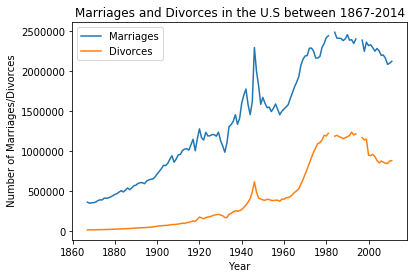

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

us_marr_div = pd.read_csv("/Users/vijaysanapala/Downloads/us-marriages-divorces-1867-2014.csv")

plt.plot(us_marr_div.Year, us_marr_div['Marriages'], label='Marriages')
plt.plot(us_marr_div.Year, us_marr_div['Divorces'], label='Divorces')

plt.title("Marriages and Divorces in the U.S between 1867-2014")
plt.xlabel("Year")
plt.ylabel(" Number of Marriages/Divorces");

plt.legend();

# Question 7 Python

### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

Text(0, 0.5, 'No of Marriages & Divorces')

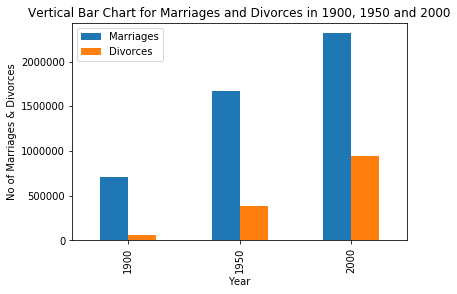

In [79]:
data_bar_graph = us_marr_div[us_marr_div['Year'].isin(['1900','1950','2000'])]
bargraph = data_bar_graph.plot(x = "Year", y = ["Marriages", "Divorces"], kind="bar")

bargraph.set_title('Vertical Bar Chart for Marriages and Divorces in 1900, 1950 and 2000')
plt.xlabel('Year')
plt.ylabel('No of Marriages & Divorces')

# Question 8 Python
### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

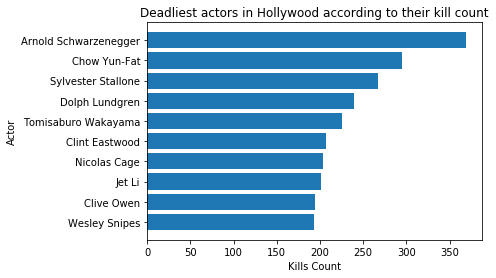

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

kills_of_actors = pd.read_csv("/Users/vijaysanapala/Downloads/actor_kill_counts.csv")
kills_of_actors = kills_of_actors.sort_values('Count')

plt.barh(kills_of_actors["Actor"], kills_of_actors.Count)

plt.xlabel('Kills Count')
plt.ylabel('Actor')
plt.title('Deadliest actors in Hollywood according to their kill count')

plt.show()

# Question 9 Python
### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
### Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

Text(0, 0.5, '')

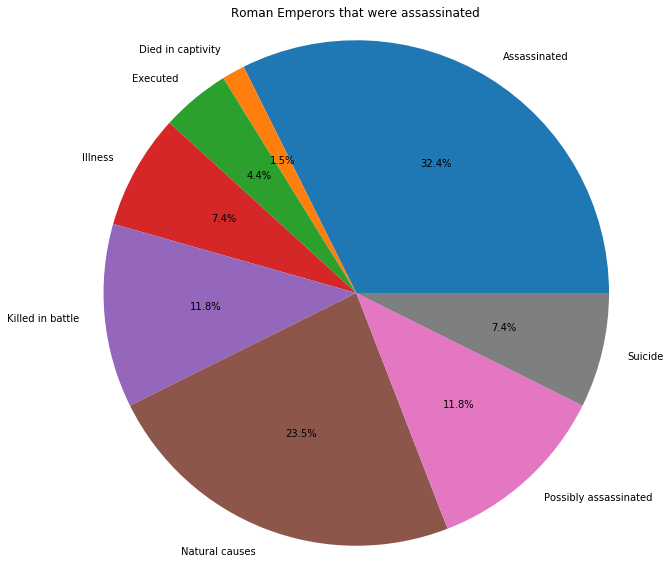

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

roman_emperors = pd.read_csv("/Users/vijaysanapala/Downloads/roman-emperor-reigns.csv")

death_group = roman_emperors.groupby('Cause_of_Death')['Emperor'].count()

death_group.plot.pie(y='Cause_of_Death', figsize=(10, 10), autopct='%1.1f%%', startangle=0, textprops={'fontsize': 10})

plt.axis('equal')
plt.title('Roman Emperors that were assassinated')
plt.ylabel('')

# Question 10 Python
### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

[Text(0, 0.5, 'Number of Computer science PhDs')]

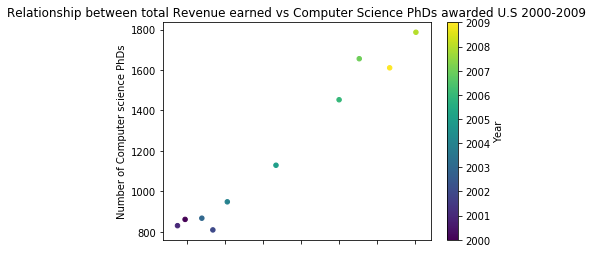

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

cs_doctorates_revenue = pd.read_csv("/Users/vijaysanapala/Downloads/arcade-revenue-vs-cs-doctorates.csv")

ster = cs_doctorates_revenue.plot.scatter(
    x='Total Arcade Revenue (billions)',
    y='Computer Science Doctorates Awarded (US)',
    c='Year',
    colormap='viridis')

ster.set_title('Relationship between total Revenue earned vs Computer Science PhDs awarded U.S 2000-2009')
ster.set(xlabel = 'Total Revenue in billions')
ster.set(ylabel = 'Number of Computer science PhDs')